In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SIMPLBYTE_ASSIGNMENT/spam_ham_dataset.csv")

In [ ]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
print(df.size) 
print(df.shape)
print(df.ndim)  
print(df.dtypes)

20684
(5171, 4)
2
Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
df .describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [ ]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [ ]:
df1=df.rename(columns={"Unnamed: 0": "Rahul"}, inplace=True)
df1

In [ ]:
df1=df.drop(['Rahul','label_num'],axis=1)
df1

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [ ]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df.label.value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [ ]:
df2=df['label'] = df['label'].replace(['ham'], 'non-spam')
# df2

In [ ]:
df['label'].unique()

array(['non-spam', 'spam'], dtype=object)

In [ ]:
df.label.value_counts()

non-spam    3672
spam        1499
Name: label, dtype: int64

<Axes: title={'center': 'label'}>

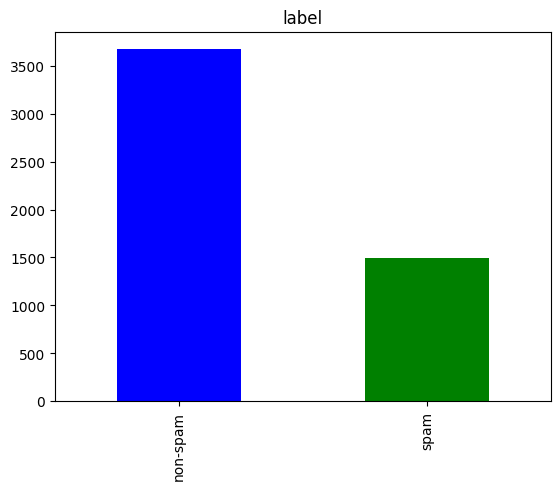

In [ ]:
df.label.value_counts().plot(kind = 'bar', color = ['b', 'g'], title = 'label')

In [ ]:
import string
import re

panch = []
for char in string.punctuation:
    panch.append(char)
def cleaning(txt):
    # case folding
    text = txt.lower()
    
    # remove multiple space, tabs, dan newlines
    text = re.sub('\s+',' ',text)
    
    # remove links
    text = text.replace("http://", " ").replace("https://", " ")
    
    # remove special characters
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    
    # remove punctuation
    text = ''.join([word for word in text if word not in panch])
    
    #remove single character
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    
    #remove numbers
    text = re.sub(r"\d+", "", text)
    
    #remove multiple spaces (again)
    text = re.sub('\s+',' ',text)
    
    return text

In [ ]:
df['text_cleaned'] = df['text'].apply(lambda x: cleaning(x))
df = df[['text', 'text_cleaned', 'label']]
df.head()

,text,text_cleaned,label
0,Subject: enron methanol ; meter # : 988291\r\n...,subject enron methanol meter this is follow up...,non-spam
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",subject hpl nom for january see attached file ...,non-spam
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",subject neon retreat ho ho ho we re around to ...,non-spam
3,"Subject: photoshop , windows , office . cheap ...",subject photoshop windows office cheap main tr...,spam
4,Subject: re : indian springs\r\nthis deal is t...,subject re indian springs this deal is to book...,non-spam


# **Data Preparation**

In [ ]:
df = df.drop(['text'], axis=1)
df = df.rename(columns = {'text_cleaned' : 'text'})
df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
df['text']= label_encoder.fit_transform(df['text'])
df['label']= label_encoder.fit_transform(df['label'])

<Axes: ylabel='Density'>

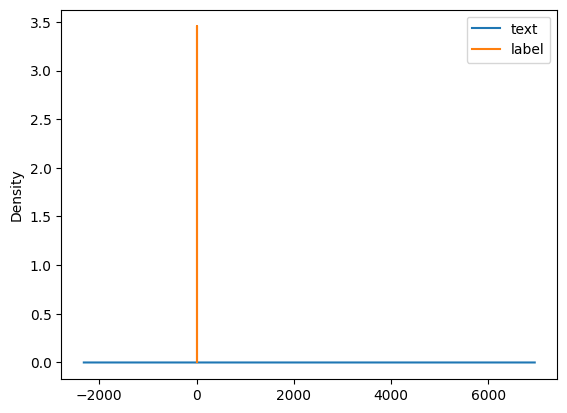

In [ ]:
df.plot.kde()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

min_max=MinMaxScaler()

# normalize all int features
col=df.columns[df.dtypes =='int64']
for i in col:
    x = df[i]
    y = np.array(x).reshape(-1,1)
    df[i] = min_max.fit_transform(y)

# normalize all float features    
col=df.columns[df.dtypes =='float64']
for i in col:
    x = df[i]
    y = np.array(x).reshape(-1,1)
    df[i] = min_max.fit_transform(y)  
    
print(df) 

          text  label
0     0.206859    0.0
1     0.363028    0.0
2     0.514668    0.0
3     0.600086    1.0
4     0.693917    0.0
...        ...    ...
5166  0.622735    0.0
5167  0.015531    0.0
5168  0.064711    0.0
5169  0.391070    0.0
5170  0.384383    1.0

[5171 rows x 2 columns]


<Axes: ylabel='Density'>

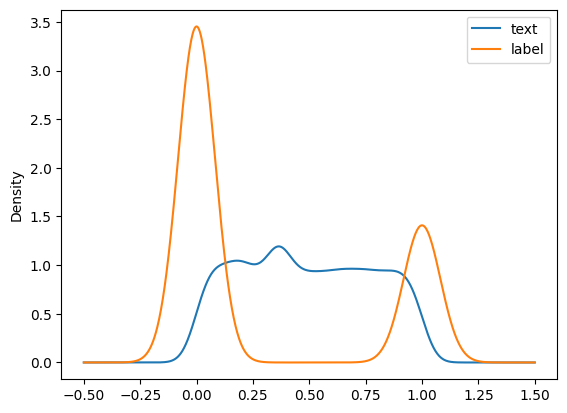

In [ ]:
df.plot.kde()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1) 

New_points = pca.fit_transform(df.iloc[:,0:1])

pca_points =pd.DataFrame(New_points, columns= ['feature 1'])

pca_model = pd.concat([pca_points,df.iloc[:,0]], axis = 1)



print(pca_model)

      feature 1      text
0     -0.281440  0.206859
1     -0.125271  0.363028
2      0.026369  0.514668
3      0.111787  0.600086
4      0.205618  0.693917
...         ...       ...
5166   0.134436  0.622735
5167  -0.472769  0.015531
5168  -0.423588  0.064711
5169  -0.097229  0.391070
5170  -0.103916  0.384383

[5171 rows x 2 columns]


In [ ]:
# x = df[['text']]
x=pca_model
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split               

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=10)

knn_model.fit(x_train, y_train)
score = knn_model.score(x_test,y_test)
print("KNN Accuracy:","{:.2f}".format(score*100),'%')

KNN Accuracy: 40.60 %


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=10)

knn_model.fit(x_train, y_train)
score = knn_model.score(x_train,y_train)
print("KNN Accuracy:","{:.2f}".format(score*100),'%')

KNN Accuracy: 49.39 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)
score = regressor.score(x_test,y_test)
print("rf Accuracy:","{:.2f}".format(score*100),'%')

rf Accuracy: 38.92 %
